In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,8)

pd.options.mode.chained_assignment = None

In [8]:
import pandas as pd
pa = pd.read_csv('indeed_data.csv')

In [8]:
pa["Salary"].value_counts()

-                                   5251
$40,000.00 /year                     102
$65,000.00 to $70,000.00 /year        86
$60.00 to $70.00 /hour                83
$40.00 to $49.00 /hour                73
                                    ... 
$30.00 /hour                           1
$100,000.00 to $180,000.00 /year       1
$90,000.00 to $95,000.00 /year         1
$20,000.00 to $130,000.00 /year        1
$50,000.00 to $60,000.00 /hour         1
Name: Salary, Length: 102, dtype: int64

In [17]:
import re
for i in range(len(pa)):
    value=pa["Salary"].values[i]
    if "hour" in value:
        if "," in value:
            pa["Salary"].values[i]=value.replace("hour","year")
    if 'hour' in value:
        num=re.findall("\$(\d+)",value)
        num=sum([int(i) for i in num])/len(num)
        pa["Salary"].values[i]=num*52*40
            #print(num)
    elif 'week' in value:
        print(value)
        num=re.findall("\$(\d+,\d+)",value)
        num =[eval(i.replace(",","")) for i in num]
        num=sum(num)/len(num)
        pa["Salary"].values[i]=num*52
    elif 'year' in value:
        num=re.findall("\$(\d+,\d+)",value)
        num =[eval(i.replace(",","")) for i in num]
        num=sum(num)/len(num)
        #print(num)
        pa["Salary"].values[i]=num

$825.00 to $1,000.00 /week


In [18]:
pa["Salary"].value_counts()

-           5251
40000.0      106
67500.0       86
135200.0      83
65000.0       75
            ... 
28080.0        1
48880.0        1
95000.0        1
23920.0        1
37440.0        1
Name: Salary, Length: 75, dtype: int64

In [51]:
import re
num=re.search("\$(.*\.) to \$(.*\.)|\$(.*\.)",value)
num.group(2)

In [50]:
print(num)

<re.Match object; span=(0, 22), match='$50,000.00 to $65,000.'>


In [66]:
pa["Sala"]

(6155, 10)

In [67]:
pa.dtypes

Unnamed: 0      int64
Title          object
Company        object
Reviews        object
Description    object
Salary         object
City           object
State          object
Pincode        object
Source         object
dtype: object

In [68]:
pa['Salary'].value_counts()

-                                  5251
$40,000.00 /year                    102
$65,000.00 to $70,000.00 /year       86
$60.00 to $70.00 /hour               83
$40.00 to $49.00 /hour               73
                                   ... 
$30,000.00 to $60,000.00 /hour        1
$10.25 to $11.00 /hour                1
$60,000.00 to $85,000.00 /year        1
$19.00 to $53.00 /hour                1
$80,000.00 to $140,000.00 /year       1
Name: Salary, Length: 102, dtype: int64

In [70]:
pa['Salary'].replace('-',np.nan, inplace=True)  #convert '-' in 'Salary' to NAs.

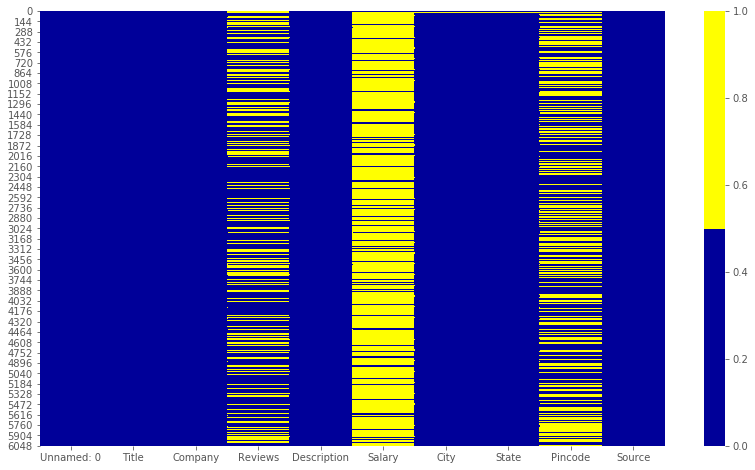

In [71]:
cols = pa.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(pa[cols].isna(), cmap=sns.color_palette(colours))

In [72]:
for col in pa.columns:
    pct_missing = np.mean(pa[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    #percentage of missing values 

Unnamed: 0 - 0.0%
Title - 0.0%
Company - 0.0%
Reviews - 34.0%
Description - 0.0%
Salary - 85.0%
City - 0.0%
State - 0.0%
Pincode - 41.0%
Source - 0.0%


created missing indicator for: Reviews
created missing indicator for: Salary
created missing indicator for: City
created missing indicator for: State
created missing indicator for: Pincode


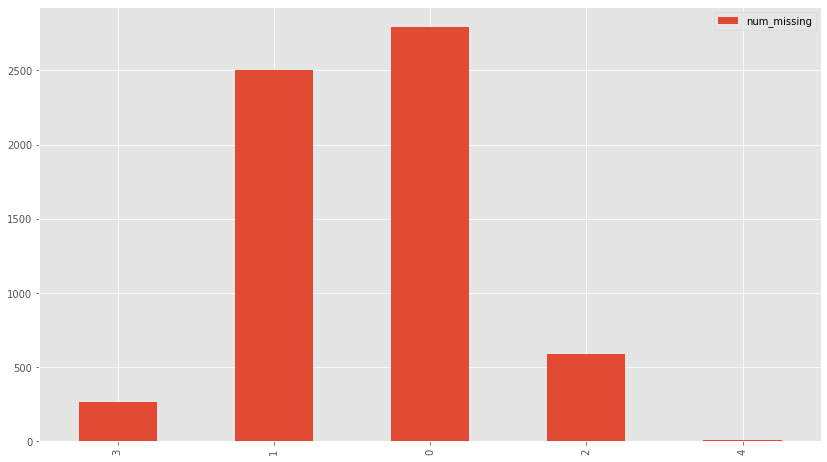

In [74]:
#create missing value histogram
for col in pa.columns:
    missing = pa[col].isna()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        pa['{}_ismissing'.format(col)] = missing #create missing indicator


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in pa.columns if 'ismissing' in col]
pa['num_missing'] = pa[ismissing_cols].sum(axis=1)

pa['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(y='num_missing')

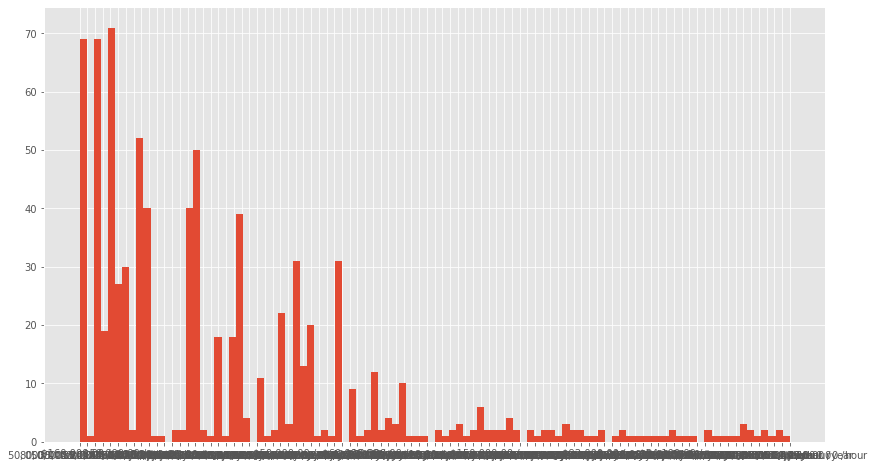

In [44]:
#histogram for checking on outliers
#pa['Salary'].hist(bins=100)